#  The Basic Tools of the Deep Life Sciences
Welcome to DeepChem's introductory tutorial for the deep life sciences. This series of notebooks is a step-by-step guide for you to get to know the new tools and techniques needed to do deep learning for the life sciences. We'll start from the basics, assuming that you're new to machine learning and the life sciences, and build up a repertoire of tools and techniques that you can use to do meaningful work in the life sciences.

**Scope:** This tutorial will encompass both the machine learning and data handling needed to build systems for the deep life sciences.

## Colab

This tutorial and the rest in the sequences are designed to be done in Google colab. If you'd like to open this notebook in colab, you can use the following link.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/deepchem/deepchem/blob/master/examples/tutorials/The_Basic_Tools_of_the_Deep_Life_Sciences.ipynb)


## Why do the DeepChem Tutorial?

**1) Career Advancement:** Applying AI in the life sciences is a booming
industry at present. There are a host of newly funded startups and initiatives
at large pharmaceutical and biotech companies centered around AI. Learning and
mastering DeepChem will bring you to the forefront of this field and will
prepare you to enter a career in this field.

**2) Humanitarian Considerations:** Disease is the oldest cause of human
suffering. From the dawn of human civilization, humans have suffered from pathogens,
cancers, and neurological conditions. One of the greatest achievements of
the last few centuries has been the development of effective treatments for
many diseases. By mastering the skills in this tutorial, you will be able to
stand on the shoulders of the giants of the past to help develop new
medicine.

**3) Lowering the Cost of Medicine:** The art of developing new medicine is
currently an elite skill that can only be practiced by a small core of expert
practitioners. By enabling the growth of open source tools for drug discovery,
you can help democratize these skills and open up drug discovery to more
competition. Increased competition can help drive down the cost of medicine.

## Getting Extra Credit
If you're excited about DeepChem and want to get more involved, there are some things that you can do right now:

* Star DeepChem on GitHub! - https://github.com/deepchem/deepchem
* Join the DeepChem forums and introduce yourself! - https://forum.deepchem.io
* Say hi on the DeepChem gitter - https://gitter.im/deepchem/Lobby
* Make a YouTube video teaching the contents of this notebook.


## Prerequisites

This tutorial sequence will assume some basic familiarity with the Python data science ecosystem. We will assume that you have familiarity with libraries such as Numpy, Pandas, and TensorFlow. We'll provide some brief refreshers on basics through the tutorial so don't worry if you're not an expert.

## Setup

The first step is to get DeepChem up and running. We recommend using Google Colab to work through this tutorial series. You'll also need to run the following commands to get DeepChem installed on your colab notebook. We are going to use a model based on tensorflow, because of that we've added [tensorflow] to the pip install command to ensure the necessary dependencies are also installed

In [8]:
!pip install --pre deepchem[tensorflow]

Installing tf_keras ensures the availability of legacy optimizers.

In [9]:
!pip install tf_keras

The os module is imported to access and modify environment variables in Python, allowing the configuration of TensorFlow to use tf_keras for legacy optimizer support.

In [10]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

In [11]:
import deepchem as dc
dc.__version__

'2.8.1.dev'

You can of course run this tutorial locally if you prefer. In this case, don't run the above cell since it will download and install Anaconda on your local machine. In either case, we can now import the `deepchem` package to play with.

# Training a Model with DeepChem: A First Example

Deep learning can be used to solve many sorts of problems, but the basic workflow is usually the same.  Here are the typical steps you follow.

1. Select the data set you will train your model on (or create a new data set if there isn't an existing suitable one).
2. Create the model.
3. Train the model on the data.
4. Evaluate the model on an independent test set to see how well it works.
5. Use the model to make predictions about new data.

With DeepChem, each of these steps can be as little as one or two lines of Python code.  In this tutorial we will walk through a basic example showing the complete workflow to solve a real world scientific problem.

The problem we will solve is predicting the solubility of small molecules given their chemical formulas.  This is a very important property in drug development: if a proposed drug isn't soluble enough, you probably won't be able to get enough into the patient's bloodstream to have a therapeutic effect.  The first thing we need is a data set of measured solubilities for real molecules.  One of the core components of DeepChem is MoleculeNet, a diverse collection of chemical and molecular data sets.  For this tutorial, we can use the Delaney solubility data set. The property of solubility in this data set is reported in log(solubility) where solubility is measured in moles/liter.

In [12]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets

I won't say too much about this code right now.  We will see many similar examples in later tutorials.  There are two details I do want to draw your attention to.  First, notice the `featurizer` argument passed to the `load_delaney()` function.  Molecules can be represented in many ways.  We therefore tell it which representation we want to use, or in more technical language, how to "featurize" the data.  Second, notice that we actually get three different data sets: a training set, a validation set, and a test set.  Each of these serves a different function in the standard deep learning workflow.

Now that we have our data, the next step is to create a model.  We will use a particular kind of model called a "graph convolutional network", or "graphconv" for short.

In [14]:
model = dc.models.GraphConvModel(n_tasks=1, mode='regression', dropout=0.2,batch_normalize=False)

Here again I will not say much about the code.  Later tutorials will give lots more information about `GraphConvModel`, as well as other types of models provided by DeepChem.

We now need to train the model on the data set.  We simply give it the data set and tell it how many epochs of training to perform (that is, how many complete passes through the data to make).

In [16]:
model.fit(train_dataset, nb_epoch=100)

0.06290914058685303

If everything has gone well, we should now have a fully trained model!  But do we?  To find out, we must evaluate the model on the test set.  We do that by selecting an evaluation metric and calling `evaluate()` on the model.  For this example, let's use the Pearson correlation, also known as r<sup>2</sup>, as our metric.  We can evaluate it on both the training set and test set.

In [17]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print("Training set score:", model.evaluate(train_dataset, [metric], transformers))
print("Test set score:", model.evaluate(test_dataset, [metric], transformers))

Training set score: {'pearson_r2_score': 0.9406411139982427}
Test set score: {'pearson_r2_score': 0.6982004688640675}


Notice that it has a higher score on the training set than the test set.  Models usually perform better on the particular data they were trained on than they do on similar but independent data.  This is called "overfitting", and it is the reason it is essential to evaluate your model on an independent test set.

Our model still has quite respectable performance on the test set.  For comparison, a model that produced totally random outputs would have a correlation of 0, while one that made perfect predictions would have a correlation of 1.  Our model does quite well, so now we can use it to make predictions about other molecules we care about.

Since this is just a tutorial and we don't have any other molecules we specifically want to predict, let's just use the first ten molecules from the test set.  For each one we print out the chemical structure (represented as a SMILES string) and the predicted log(solubility). To put these predictions in
context, we print out the log(solubility) values from the test set as well.

In [18]:
solubilities = model.predict_on_batch(test_dataset.X[:10])
for molecule, solubility, test_solubility in zip(test_dataset.ids, solubilities, test_dataset.y):
    print(solubility, test_solubility, molecule)

[-0.95098245] [-1.60114461] c1cc2ccc3cccc4ccc(c1)c2c34
[0.75051576] [0.20848251] Cc1cc(=O)[nH]c(=S)[nH]1
[-0.33389068] [-0.01602738] Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4 
[-1.282418] [-2.82191713] c1ccc2c(c1)cc3ccc4cccc5ccc2c3c45
[-0.34712481] [-0.52891635] C1=Cc2cccc3cccc1c23
[1.503366] [1.10168349] CC1CO1
[0.06481756] [-0.88987406] CCN2c1ccccc1N(C)C(=S)c3cccnc23 
[-0.31424755] [-0.52649706] CC12CCC3C(CCc4cc(O)ccc34)C2CCC1=O
[-0.35844934] [-0.76358725] Cn2cc(c1ccccc1)c(=O)c(c2)c3cccc(c3)C(F)(F)F
[0.35235196] [-0.64020358] ClC(Cl)(Cl)C(NC=O)N1C=CN(C=C1)C(NC=O)C(Cl)(Cl)Cl 


MAE: 1.4077067158130543
R^2: 0.3202092113551689


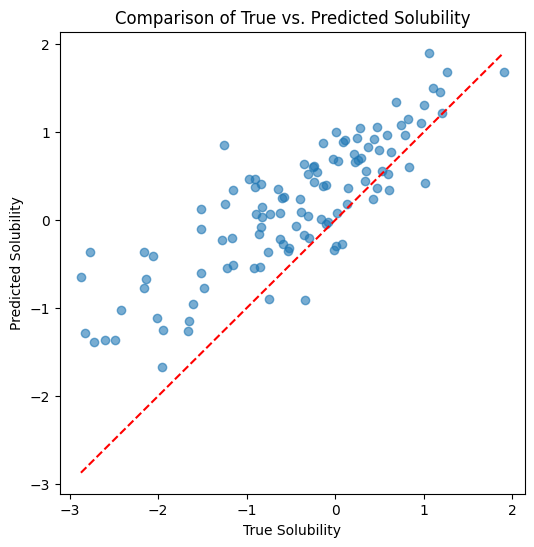

In [24]:
import matplotlib.pyplot as plt
import numpy as np
y_pred = model.predict(test_dataset)

# 2. 获取真实值（若使用了 transform，需要做反变换）
y_true = test_dataset.y

from deepchem.metrics import Metric, mae_score, r2_score
mae_metric = Metric(mae_score)
r2_metric = Metric(r2_score)

scores = model.evaluate(test_dataset, [mae_metric, r2_metric], transformers)
print("MAE:", scores['mae_score'])
print("R^2:", scores['r2_score'])


plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.xlabel("True Solubility")
plt.ylabel("Predicted Solubility")
plt.title("Comparison of True vs. Predicted Solubility")
# 可添加一条 y=x 的参考线
x_vals = np.linspace(min(y_true), max(y_true), 100)
plt.plot(x_vals, x_vals, color='red', linestyle='--')
plt.show()


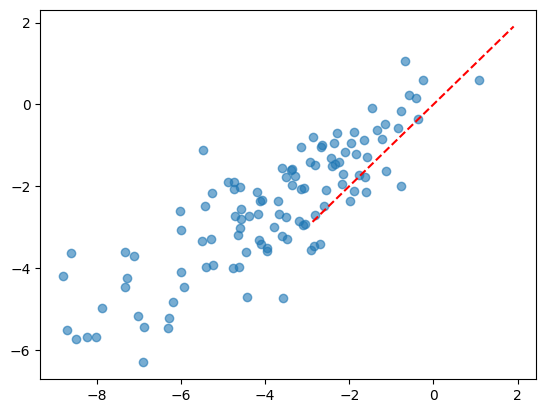

In [26]:
y_pred_undo = dc.trans.undo_transforms(y_pred, transformers)
y_true_undo = dc.trans.undo_transforms(y_true, transformers)
plt.scatter(y_true_undo, y_pred_undo, alpha=0.6)
plt.plot(x_vals, x_vals, 'r--')  # 参考线 y = x


In [29]:
if len(transformers) == 0:
    print("No transformers. The dataset was not transformed.")
else:
    print("There are transformers:")
    for t in transformers:
        print(type(t), t.transform_y, t.transform_X)


There are transformers:
<class 'deepchem.trans.transformers.NormalizationTransformer'> True False


In [34]:
# 6. 可选：打印前几个分子的真实值和预测值进行查看
print("\nExample predictions (first =10 molecules):")
for i in range(10):
    # 数据集中可能有分子 ID，如果需要，可以查看 test_dataset.ids
    mol_id = test_dataset.ids[i] if test_dataset.ids is not None else f"Mol_{i}"
    print("Pred: {:.3f}, True: {:.3f}, ID: {}".format(y_pred_undo[i][0], y_true_undo[i][0], mol_id))
    # print(f"Molecule: {mol_id}")
    # print(f"  True: {y_true_undo[i][0]:.4f}")
    # print(f"  Pred: {y_pred_undo[i][0]:.4f}")



Example predictions (first =10 molecules):
Pred: -4.832, True: -6.176, ID: c1cc2ccc3cccc4ccc(c1)c2c34
Pred: -1.316, True: -2.436, ID: Cc1cc(=O)[nH]c(=S)[nH]1
Pred: -3.557, True: -2.900, ID: Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4 
Pred: -5.517, True: -8.699, ID: c1ccc2c(c1)cc3ccc4cccc5ccc2c3c45
Pred: -3.584, True: -3.960, ID: C1=Cc2cccc3cccc1c23
Pred: 0.240, True: -0.590, ID: CC1CO1
Pred: -2.733, True: -4.706, ID: CCN2c1ccccc1N(C)C(=S)c3cccnc23 
Pred: -3.516, True: -3.955, ID: CC12CCC3C(CCc4cc(O)ccc34)C2CCC1=O
Pred: -3.608, True: -4.445, ID: Cn2cc(c1ccccc1)c(=O)c(c2)c3cccc(c3)C(F)(F)F
Pred: -2.139, True: -4.190, ID: ClC(Cl)(Cl)C(NC=O)N1C=CN(C=C1)C(NC=O)C(Cl)(Cl)Cl 


In [35]:
tasks

['measured log solubility in mols per litre']

# Congratulations! Time to join the Community!

Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:

## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)
This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.

## Join the DeepChem Gitter
The DeepChem [Gitter](https://gitter.im/deepchem/Lobby) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!

## Citing This Tutorial
If you found this tutorial useful please consider citing it using the provided BibTeX.

In [25]:
@manual{Intro1,
 title={The Basic Tools of the Deep Life Sciences},
 organization={DeepChem},
 author={Ramsundar, Bharath},
 howpublished = {\url{https://github.com/deepchem/deepchem/blob/master/examples/tutorials/The_Basic_Tools_of_the_Deep_Life_Sciences.ipynb}},
 year={2021},
}

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-25-ee2afb43272e>, line 2)